### 1. Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

### 2. Load dataset & Preprocessing it

In [2]:
airline_data = pd.read_csv('EastWestAirlines.csv')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline_data = airline_data.rename(columns={'ID#':'ID','Award?':'Award'})

In [4]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### 3. EDA

In [5]:
airline_data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


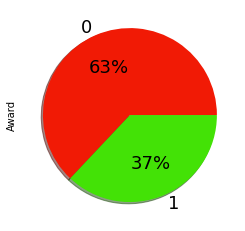

In [6]:
airline_data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

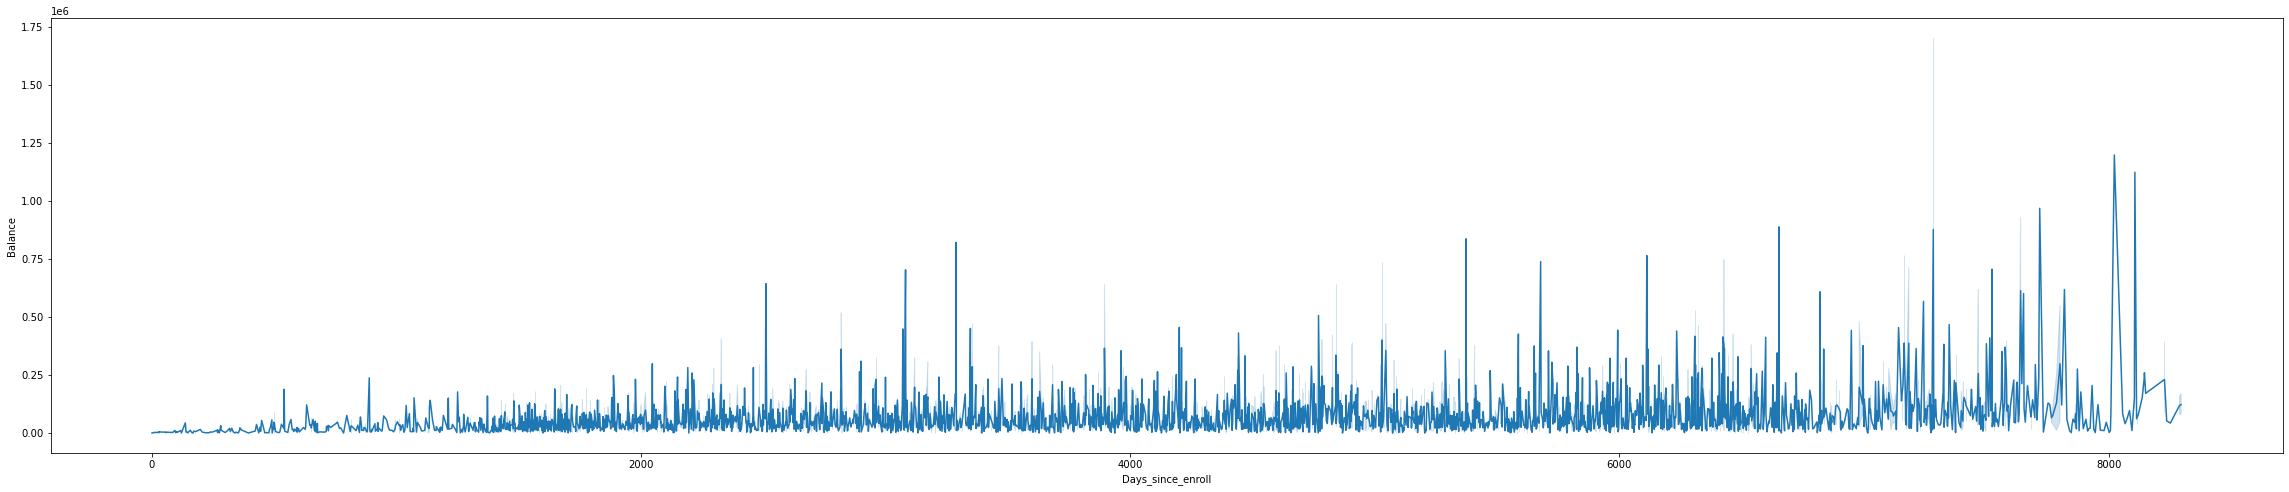

In [7]:
# Plot shows max enroll days will max miles balance.

fig, ax =plt.subplots(figsize=(40,8))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = airline_data)

###### Correlation Matrix

<AxesSubplot:>

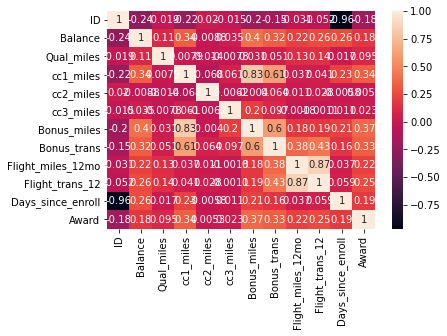

In [8]:
sns.heatmap(airline_data.corr(),annot=True) #Since there is no correlation between variables. So need not to go with PCA. Before applying clustering. For the First Stage.

### 4. Data Preprocessing

In [9]:
#dropping Columns ID & Award. Since they are not useful for data analysis

airline_data_1=airline_data.drop(['ID','Award'],axis=1)
airline_data_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


###### Standardising the data

In [10]:
from sklearn.preprocessing import StandardScaler

airline_data_1_std = StandardScaler().fit_transform(airline_data_1)
airline_data_1_std


array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [11]:
airline_data_1_std.shape

(3999, 10)

###### MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

airline_data_1_minmax = MinMaxScaler().fit_transform(airline_data_1)
airline_data_1_minmax

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84374246],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.        ,
        0.83988425],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.        ,
        0.84784181],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.16879672],
       [0.03220189, 0.        , 0.        , ..., 0.01622481, 0.01886792,
        0.16867615],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.16831444]])

In [13]:
airline_data_1_minmax.shape

(3999, 10)

###### PCA

In [14]:
#PCA for standardised data

from sklearn.decomposition import PCA

pca = PCA(random_state=10, n_components = 0.95)
pca_std = pca.fit_transform(airline_data_1_std)
pca_std

array([[-1.30259849, -0.06672133, -0.83747912, ...,  1.29486574,
        -0.63453959,  0.31684132],
       [-1.28625898, -0.06339178, -0.7842588 , ...,  1.24935537,
        -0.72120272,  0.24497869],
       [-1.0325221 , -0.13688067, -0.81075855, ...,  1.25188529,
        -0.59444208,  0.12847069],
       ...,
       [-0.23455655, -0.57857909,  0.55814645, ..., -1.01381263,
         0.65211943,  0.49091492],
       [-1.52141921,  0.72682723,  0.39141878, ..., -0.33635817,
         0.79154696,  0.41323792],
       [-1.96207193,  0.40994447,  0.49043906, ..., -0.47367864,
         0.41666697,  0.43238182]])

In [15]:
#PCA for MinMaxScaled data

pca = PCA(random_state=10, n_components = 0.95)
pca_minmax = pca.fit_transform(airline_data_1_minmax)
pca_minmax

array([[-0.18703213,  0.41266243, -0.07648828, -0.00529279, -0.0028598 ],
       [-0.18610737,  0.40820716, -0.06922368, -0.00313584, -0.00648617],
       [-0.17547713,  0.41431082, -0.04958389, -0.00076815, -0.01021099],
       ...,
       [ 0.12324369, -0.37735626, -0.08370618, -0.00512705,  0.01153869],
       [-0.37049417, -0.23488696, -0.04153639, -0.01735555,  0.00594571],
       [-0.37564393, -0.23577567, -0.07018784, -0.00993757,  0.00515938]])

In [16]:
# normalising the data

def norm_func(i):
    x=(i-i.min()/i.std())
    return (x)
df_norm=norm_func(airline_data_1.iloc[:,1:])

### 5. Model Building

###### K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto',init="k-means++")
model.fit(df_norm)

KMeans(max_iter=600, n_clusters=3)

In [25]:
pred=model.predict(df_norm)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
model.cluster_centers_

array([[ 1.50595465e+02,  3.28806085e+00, -5.76679518e+00,
        -4.10278789e+00,  4.51646659e+04,  1.97434368e+01,
         6.76342482e+02,  1.93317422e+00,  4.73830213e+03],
       [ 1.38969055e+02,  7.18692176e-01, -5.75549792e+00,
        -4.12155524e+00,  6.59024821e+03,  8.90488599e+00,
         3.64442345e+02,  1.11498371e+00,  3.90944463e+03],
       [ 2.58021978e+02,  4.06494983e+00, -5.77276177e+00,
        -3.77023262e+00,  1.15188879e+05,  2.76153846e+01,
         1.69395604e+03,  4.94505495e+00,  5.46618584e+03]])

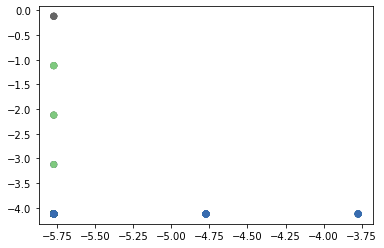

In [27]:
plt.scatter(df_norm.iloc[:,2],df_norm.iloc[:,3],c=pred,cmap=plt.cm.Accent)

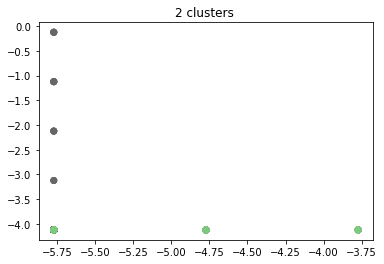

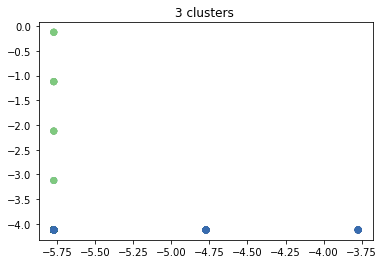

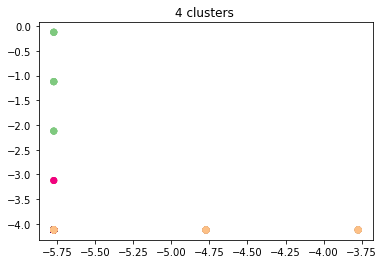

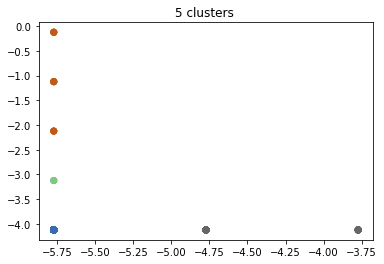

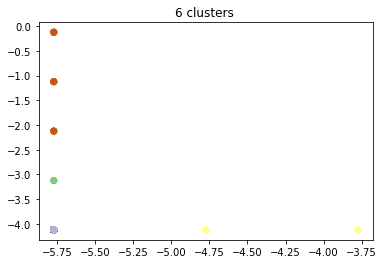

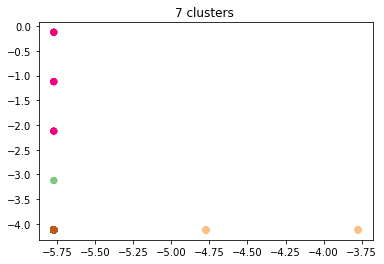

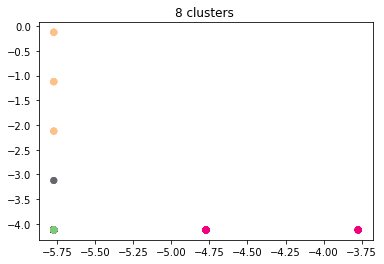

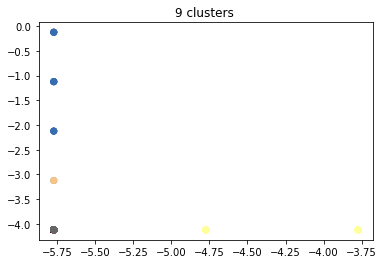

In [28]:
for i in range(2,10):
    model = KMeans(n_clusters=i, max_iter=600, algorithm = 'auto',init="k-means++",)
    model.fit(airline_data_1_std)    
    pred=model.predict(airline_data_1_std)    
    plt.scatter(df_norm.iloc[:,2],df_norm.iloc[:,3],c=pred,cmap=plt.cm.Accent)
    plt.title(str(i)+ " clusters ")
    plt.show()

In [29]:
model.cluster_centers_

array([[ 1.47957347e+00, -5.62130771e-02,  1.84651193e+00,
        -9.82418871e-02, -4.82961802e-02,  2.13783210e+00,
         1.07342739e+00,  9.77402745e-02,  1.23451563e-01,
         6.68359173e-01],
       [-2.10710173e-01, -1.09205883e-01, -6.91445162e-01,
        -9.82418871e-02, -5.76644668e-02, -5.51092234e-01,
        -5.82128045e-01, -1.92469692e-01, -2.02498508e-01,
         8.05151961e-01],
       [ 2.40051986e-02, -1.36140948e-01,  8.92108406e-01,
        -9.82418871e-02, -5.79657162e-02,  3.73435775e-01,
         5.99334530e-01, -2.05153995e-01, -2.29717830e-01,
         1.31930416e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.

###### Hierarchical Clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [31]:
xdist=pdist(airline_data_1_std,metric="euclidean")

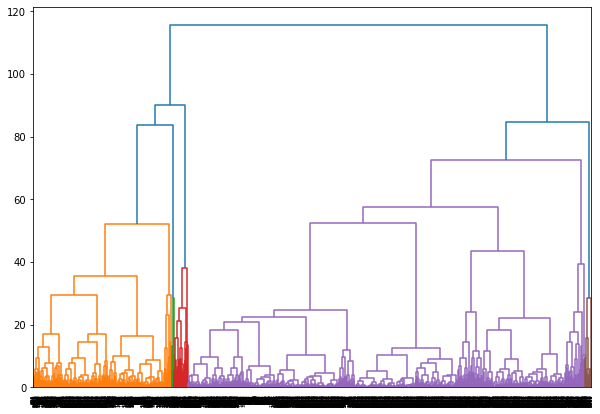

In [32]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [33]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="l1", linkage='complete')
pred=cluster.fit_predict(airline_data_1_std)

In [34]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

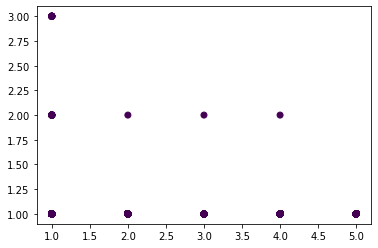

In [35]:
plt.scatter(airline_data_1.iloc[:,2],airline_data_1.iloc[:,3],c=pred)

###### DBScan

In [40]:
from sklearn.cluster import DBSCAN 

In [41]:
min_samples=2

In [43]:
dbs=DBSCAN(min_samples=2,eps=0.2)
clas_pr=dbs.fit_predict(airline_data_1.iloc[:,:2])

In [44]:
clas_pr

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [46]:
airline_data_1["class_pr"]=claas_pr
airline_data_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,class_pr
0,28143,0,1,1,1,174,1,0,0,7000,-1
1,19244,0,1,1,1,215,2,0,0,6968,-1
2,41354,0,1,1,1,4123,4,0,0,7034,-1
3,14776,0,1,1,1,500,1,0,0,6952,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,-1
3995,64385,0,1,1,1,981,5,0,0,1395,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,-1
3997,54899,0,1,1,1,500,1,500,1,1401,-1


Text(0, 0.5, 'cc2_miles')

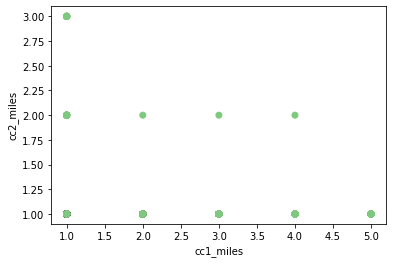

In [47]:
import matplotlib.pyplot as plt
plt.scatter(airline_data_1["cc1_miles"],airline_data_1["cc2_miles"],c=airline_data_1["class_pr"],cmap=plt.cm.Accent)
plt.xlabel("cc1_miles")
plt.ylabel("cc2_miles")

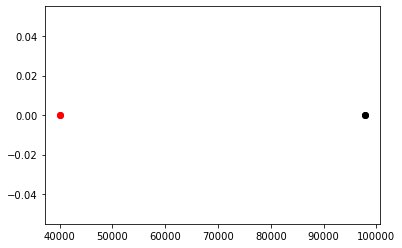

In [49]:
plt.scatter(airline_data_1[airline_data_1["class_pr"]==1].iloc[:,0],airline_data_1[airline_data_1["class_pr"]==1].iloc[:,1],color="red")
plt.scatter(airline_data_1[airline_data_1["class_pr"]==0].iloc[:,0],airline_data_1[airline_data_1["class_pr"]==0].iloc[:,1],color="black")